In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv('./pluto_svi_311_2019.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df_raw.copy()

In [4]:
df.columns

Index(['Unnamed: 0', 'OBJECTID', 'ZipCode', 'ZoneDist1', 'BldgClass',
       'LandUse', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'NumBldgs',
       'NumFloors', 'UnitsTotal', 'YearBuilt', 'HistDist', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BBL', 'svi_FIPS', 'svi_E_Totpop',
       'svi_E_HU', 'svi_E_HH', 'svi_E_POV', 'svi_E_Unemp', 'svi_E_PCI',
       'svi_E_Munit', 'svi_E_Crowd', 'svi_EP_POV', 'svi_EP_Unemp',
       'svi_EP_PCI', 'svi_EP_MUN', 'svi_EP_CRO', '311_Unique', '311_Created',
       '311_Closed', '311_Complaint_Type', '311_Descriptor_Type', '311_Status',
       '311BBL', '311_pests'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857168 entries, 0 to 857167
Data columns (total 47 columns):
Unnamed: 0             857168 non-null int64
OBJECTID               857168 non-null int64
ZipCode                856584 non-null float64
ZoneDist1              856692 non-null object
BldgClass              856707 non-null object
LandUse                854377 non-null float64
LotArea                856707 non-null float64
BldgArea               856706 non-null float64
ComArea                810415 non-null float64
ResArea                810415 non-null float64
OfficeArea             810415 non-null float64
RetailArea             810415 non-null float64
GarageArea             810415 non-null float64
StrgeArea              810415 non-null float64
FactryArea             810415 non-null float64
NumBldgs               856707 non-null float64
NumFloors              856707 non-null float64
UnitsTotal             856707 non-null float64
YearBuilt              856707 non-null float64
Hi

In [6]:
df['LandUse'].isna().sum()

2791

In [7]:
df['LandUse'].value_counts()

1.0     565415
2.0     131264
4.0      55023
11.0     26775
5.0      21496
3.0      12488
8.0      12133
10.0      9850
6.0       9824
7.0       6062
9.0       4047
Name: LandUse, dtype: int64

In [8]:
code_landuse = {1:'One & Two Family Buildings', 2:'Multi-Family Walkup Buildings', 3:'Multi-Family Elevators Buildings',
                4:'Mixed Residential & Comercial Buildings', 5:'Commercial & Office Buildings', 6:'Industrial & Manufacturing',
                7:'Transportation & Utility', 8:'Public Facilities & Institutions', 9:'Open Space & Outdoor Recreation',
                10:'Parking Facilities', 11:'Vacant Land'
               }
df['LandUse'].replace(code_landuse, inplace = True)

In [20]:
df['311_Descriptor_Type'].isna().sum()

844601

In [21]:
df_pest = df.dropna(subset = ['311_Descriptor_Type'])

In [22]:
df_pest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12567 entries, 39 to 856635
Data columns (total 47 columns):
Unnamed: 0             12567 non-null int64
OBJECTID               12567 non-null int64
ZipCode                12567 non-null float64
ZoneDist1              12567 non-null object
BldgClass              12567 non-null object
LandUse                12566 non-null object
LotArea                12567 non-null float64
BldgArea               12567 non-null float64
ComArea                12441 non-null float64
ResArea                12441 non-null float64
OfficeArea             12441 non-null float64
RetailArea             12441 non-null float64
GarageArea             12441 non-null float64
StrgeArea              12441 non-null float64
FactryArea             12441 non-null float64
NumBldgs               12567 non-null float64
NumFloors              12567 non-null float64
UnitsTotal             12567 non-null float64
YearBuilt              12567 non-null float64
HistDist              

In [27]:
df_pest['LandUse'].value_counts()

Multi-Family Walkup Buildings              5261
Mixed Residential & Comercial Buildings    2735
Multi-Family Elevators Buildings           2637
One & Two Family Buildings                 1611
Commercial & Office Buildings               172
Public Facilities & Institutions            112
Industrial & Manufacturing                   11
Vacant Land                                  10
Parking Facilities                            9
Transportation & Utility                      5
Open Space & Outdoor Recreation               3
Name: LandUse, dtype: int64

In [28]:
df_plot = pd.DataFrame({'Pest Cases':df_pest['LandUse'].value_counts()}).reset_index().rename(columns={'index': 'Land Use'})

In [29]:
df_plot.head()

,Land Use,Pest Cases
0,Multi-Family Walkup Buildings,5261
1,Mixed Residential & Comercial Buildings,2735
2,Multi-Family Elevators Buildings,2637
3,One & Two Family Buildings,1611
4,Commercial & Office Buildings,172


In [30]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
Land Use      11 non-null object
Pest Cases    11 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [31]:
df['311_pests'].value_counts()

False    844603
True      12565
Name: 311_pests, dtype: int64

In [15]:
df['LandUse'].value_counts()

One & Two Family Buildings                 565415
Multi-Family Walkup Buildings              131264
Mixed Residential & Comercial Buildings     55023
Vacant Land                                 26775
Commercial & Office Buildings               21496
Multi-Family Elevators Buildings            12488
Public Facilities & Institutions            12133
Parking Facilities                           9850
Industrial & Manufacturing                   9824
Transportation & Utility                     6062
Open Space & Outdoor Recreation              4047
Name: LandUse, dtype: int64

In [16]:
df2 = pd.DataFrame({'Number of Cases':df['LandUse'].value_counts()}).reset_index().rename(columns={'index': 'Land Use'})
df2

,Land Use,Number of Cases
0,One & Two Family Buildings,565415
1,Multi-Family Walkup Buildings,131264
2,Mixed Residential & Comercial Buildings,55023
3,Vacant Land,26775
4,Commercial & Office Buildings,21496
5,Multi-Family Elevators Buildings,12488
6,Public Facilities & Institutions,12133
7,Parking Facilities,9850
8,Industrial & Manufacturing,9824
9,Transportation & Utility,6062


In [32]:
df_plot['Total Cases'] = df_plot['Land Use'].map(df2.set_index('Land Use')['Number of Cases'])

In [33]:
df_plot['Ratio of Pest Cases'] = df_plot['Pest Cases'] / df_plot['Total Cases']
df_plot.sort_values(by='Ratio of Pest Cases',ascending=False)

,Land Use,Pest Cases,Total Cases,Ratio of Pest Cases
2,Multi-Family Elevators Buildings,2637,12488,0.211163
1,Mixed Residential & Comercial Buildings,2735,55023,0.049706
0,Multi-Family Walkup Buildings,5261,131264,0.040080
5,Public Facilities & Institutions,112,12133,0.009231
4,Commercial & Office Buildings,172,21496,0.008001
3,One & Two Family Buildings,1611,565415,0.002849
6,Industrial & Manufacturing,11,9824,0.001120
8,Parking Facilities,9,9850,0.000914
9,Transportation & Utility,5,6062,0.000825
10,Open Space & Outdoor Recreation,3,4047,0.000741


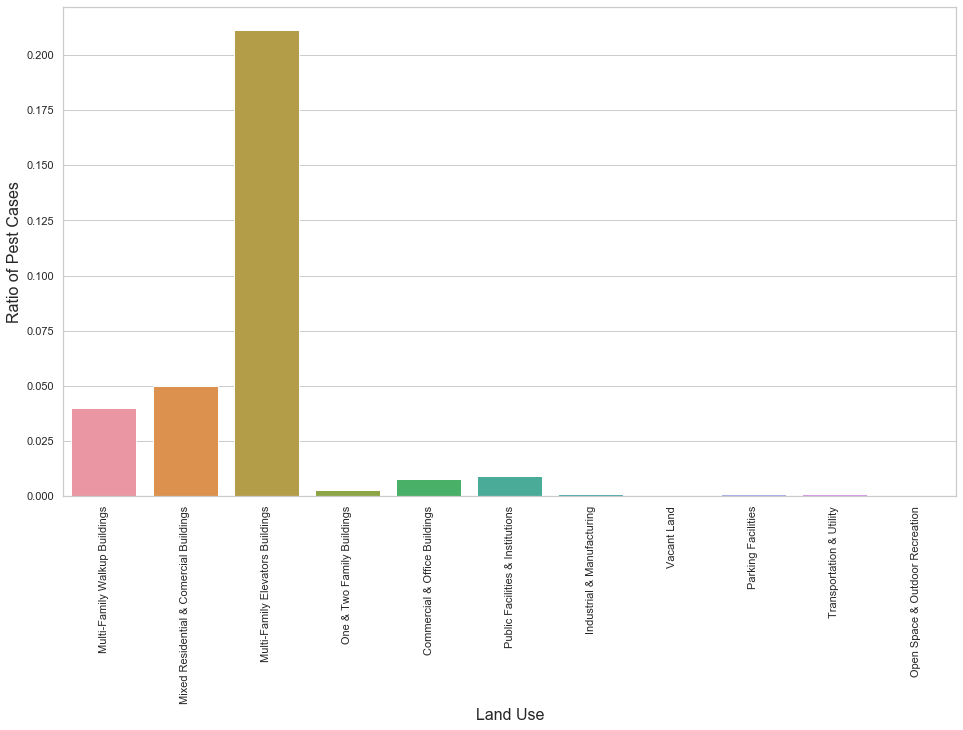

In [40]:
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
plt.xticks(rotation=90)
plt.xlabel('Land Use', fontsize=16)
plt.ylabel('Number of Pest Cases', fontsize=16)
ax1 = sns.barplot(x='Land Use', y='Ratio of Pest Cases', data=df_plot)
plt.savefig('ratio_pest_case_landuse.png', bbox_inches = "tight")

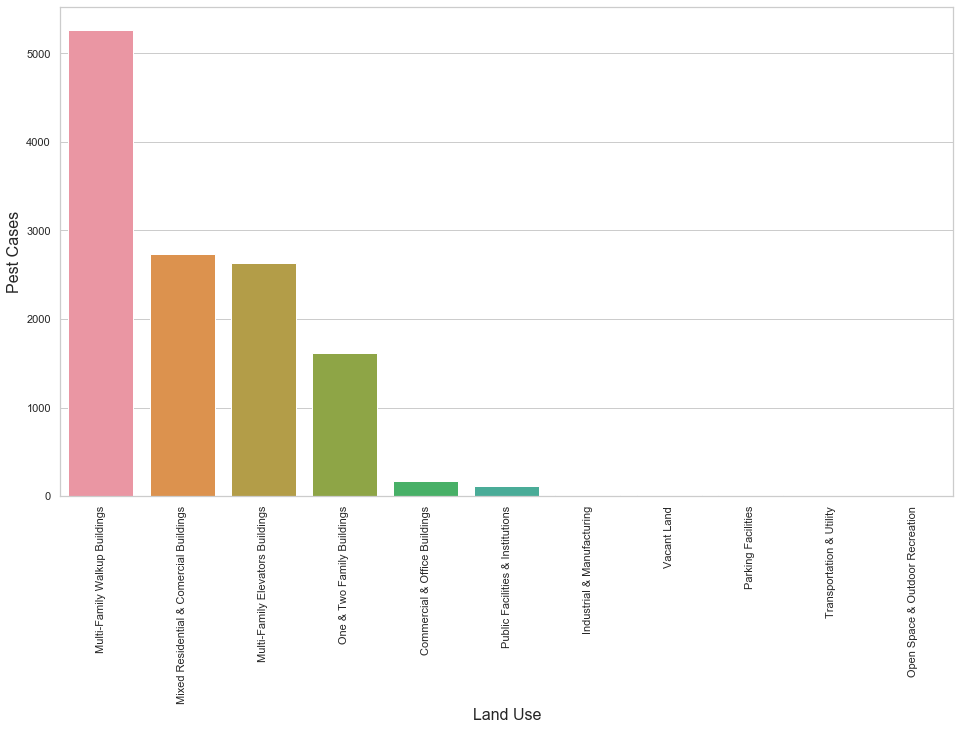

In [43]:
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")
plt.xticks(rotation=90)
plt.xlabel('Land Use', fontsize=16)
plt.ylabel('Number of Pest Cases', fontsize=16)
sns.barplot(x='Land Use', y='Pest Cases', data=df_plot)
plt.savefig('pest_case_landuse.png', bbox_inches = "tight")

## GFA

In [228]:
df_gfa = pd.DataFrame(df_pest['BldgArea'].value_counts()).reset_index().rename(columns={'index':'gfa','BldgArea':'complaint_counts'})
df_gfa = df_gfa.replace(0, np.nan)
df_gfa = df_gfa.dropna()
df_gfa.head()

,gfa,complaint_counts
0,3000.0,249
1,57500.0,206
2,79440.0,186
3,4500.0,109
4,3300.0,99


In [229]:
df_gfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7660 entries, 0 to 7660
Data columns (total 2 columns):
gfa                 7660 non-null float64
complaint_counts    7660 non-null int64
dtypes: float64(1), int64(1)
memory usage: 179.5 KB


In [230]:
columns = df_gfa.columns.tolist()
new_col = 'gfa_group'
columns.insert(0, new_col)
num_groups = len([i for i in range(1,int(df_gfa.gfa.max())+500,500)])
labels = [f'group {i*500-500+1} - {i*500}' for i in range(1,num_groups)]
df_gfa[new_col] = pd.cut(x=df_gfa.gfa, 
                     bins=[i for i in range(1,int(df_gfa.gfa.max())+500,500)], # every 500 a group
                     labels=labels)

In [231]:
num_groups

27082

In [221]:
# columns = df_gfa.columns.tolist()
# new_col = 'gfa_group'
# columns.insert(0, new_col)
# num_groups = len([i for i in range(1,100000,1000)])
# labels = [f'group {i*1000-1000+1} - {i*1000}' for i in range(1,num_groups)]
# df_gfa[new_col] = pd.cut(x=df_gfa.gfa, 
#                      bins=[i for i in range(1,100000,1000)], # every 1000 a group
#                      labels=labels)

In [175]:
df_gfa.gfa.max()

13540113.0

In [33]:
# columns = df_gfa.columns.tolist()
# new_col = 'gfa_group'
# columns.insert(0, new_col)
# num_groups = len([i for i in range(1,len(df_gfa.gfa),500)])
# labels = [f'group {i*500-500+1} - {i*500}' for i in range(1,num_groups)]
# df_gfa[new_col] = pd.cut(x=df_gfa.gfa, 
#                      bins=[i for i in range(1,len(df_gfa.gfa),500)], # every 500 a group
#                      labels=labels)

In [87]:
[i for i in range(1,int(df_gfa.gfa.max()),500)]


[1,
 501,
 1001,
 1501,
 2001,
 2501,
 3001,
 3501,
 4001,
 4501,
 5001,
 5501,
 6001,
 6501,
 7001,
 7501,
 8001,
 8501,
 9001,
 9501,
 10001,
 10501,
 11001,
 11501,
 12001,
 12501,
 13001,
 13501,
 14001,
 14501,
 15001,
 15501,
 16001,
 16501,
 17001,
 17501,
 18001,
 18501,
 19001,
 19501,
 20001,
 20501,
 21001,
 21501,
 22001,
 22501,
 23001,
 23501,
 24001,
 24501,
 25001,
 25501,
 26001,
 26501,
 27001,
 27501,
 28001,
 28501,
 29001,
 29501,
 30001,
 30501,
 31001,
 31501,
 32001,
 32501,
 33001,
 33501,
 34001,
 34501,
 35001,
 35501,
 36001,
 36501,
 37001,
 37501,
 38001,
 38501,
 39001,
 39501,
 40001,
 40501,
 41001,
 41501,
 42001,
 42501,
 43001,
 43501,
 44001,
 44501,
 45001,
 45501,
 46001,
 46501,
 47001,
 47501,
 48001,
 48501,
 49001,
 49501,
 50001,
 50501,
 51001,
 51501,
 52001,
 52501,
 53001,
 53501,
 54001,
 54501,
 55001,
 55501,
 56001,
 56501,
 57001,
 57501,
 58001,
 58501,
 59001,
 59501,
 60001,
 60501,
 61001,
 61501,
 62001,
 62501,
 63001,
 63501,


In [88]:
len([i for i in range(1,int(df_gfa.gfa.max()),500)])

171797

In [232]:
df_gfa.head()

,gfa,complaint_counts,gfa_group
0,3000.0,249,group 2501 - 3000
1,57500.0,206,group 57001 - 57500
2,79440.0,186,group 79001 - 79500
3,4500.0,109,group 4001 - 4500
4,3300.0,99,group 3001 - 3500


In [233]:
gfa_plot = df_gfa[['complaint_counts','gfa_group']].groupby('gfa_group').sum().sort_values(by='gfa_group').reset_index()
gfa_plot

,gfa_group,complaint_counts
0,group 1 - 500,2
1,group 501 - 1000,112
2,group 1001 - 1500,547
3,group 1501 - 2000,1060
4,group 2001 - 2500,1175
5,group 2501 - 3000,1357
6,group 3001 - 3500,1269
7,group 3501 - 4000,753
8,group 4001 - 4500,535
9,group 4501 - 5000,465


In [234]:
gfa_plot = gfa_plot.replace(0, np.nan)
gfa_plot = gfa_plot.dropna()
gfa_plot

,gfa_group,complaint_counts
0,group 1 - 500,2.0
1,group 501 - 1000,112.0
2,group 1001 - 1500,547.0
3,group 1501 - 2000,1060.0
4,group 2001 - 2500,1175.0
5,group 2501 - 3000,1357.0
6,group 3001 - 3500,1269.0
7,group 3501 - 4000,753.0
8,group 4001 - 4500,535.0
9,group 4501 - 5000,465.0


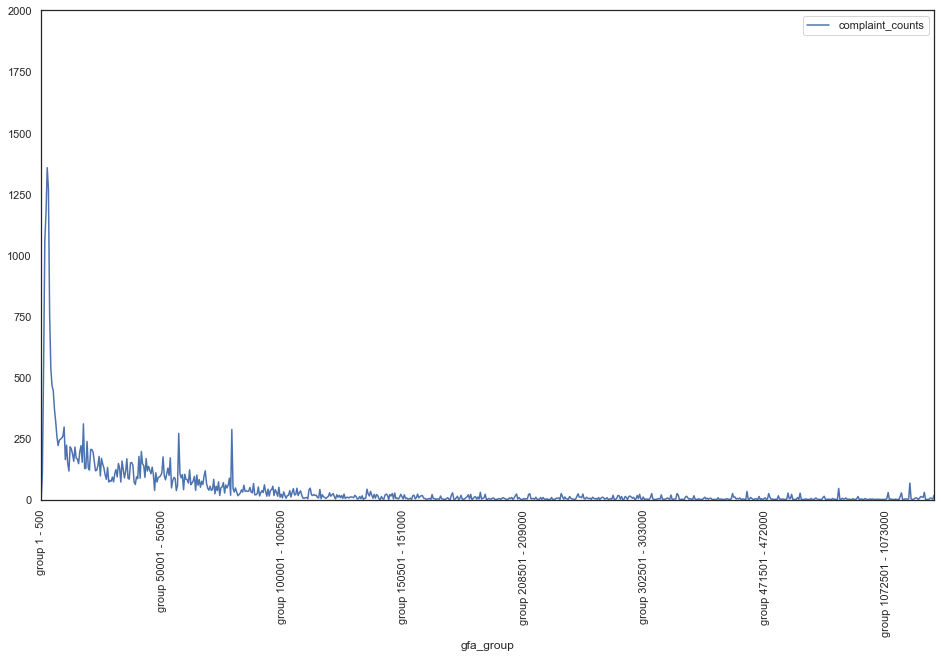

In [237]:
gfa_plot.plot(x='gfa_group',y='complaint_counts',rot=90,figsize=(16,9),ylim=[0,2000])

In [130]:
gfa_plot[gfa_plot.complaint_counts<1000].sum()

gfa_group           group 15001 - 15500group 15501 - 16000group 16...
complaint_counts                                                52312
dtype: object

In [183]:
gfa_plot[gfa_plot.complaint_counts<1000]

,gfa_group,complaint_counts
0,group 1 - 500,2.0
1,group 501 - 1000,112.0
2,group 1001 - 1500,547.0
7,group 3501 - 4000,753.0
8,group 4001 - 4500,535.0
9,group 4501 - 5000,465.0
10,group 5001 - 5500,446.0
11,group 5501 - 6000,369.0
12,group 6001 - 6500,320.0
13,group 6501 - 7000,260.0


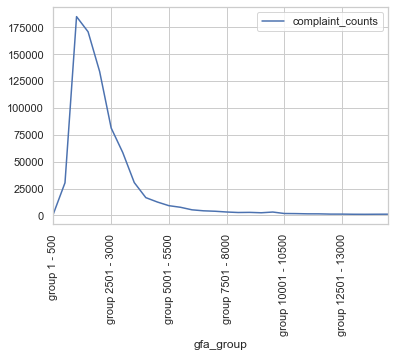

In [137]:
temp = gfa_plot.head(30)
temp.plot(x='gfa_group',y='complaint_counts',rot=90)

In [29]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 2 columns):
gfa_group           50 non-null category
complaint_counts    50 non-null float64
dtypes: category(1), float64(1)
memory usage: 6.3 MB


In [238]:
temp = gfa_plot.copy()
temp

,gfa_group,complaint_counts
0,group 1 - 500,2.0
1,group 501 - 1000,112.0
2,group 1001 - 1500,547.0
3,group 1501 - 2000,1060.0
4,group 2001 - 2500,1175.0
5,group 2501 - 3000,1357.0
6,group 3001 - 3500,1269.0
7,group 3501 - 4000,753.0
8,group 4001 - 4500,535.0
9,group 4501 - 5000,465.0


In [140]:
temp['gfa_group']

0           group 1 - 500
1        group 501 - 1000
2       group 1001 - 1500
3       group 1501 - 2000
4       group 2001 - 2500
5       group 2501 - 3000
6       group 3001 - 3500
7       group 3501 - 4000
8       group 4001 - 4500
9       group 4501 - 5000
10      group 5001 - 5500
11      group 5501 - 6000
12      group 6001 - 6500
13      group 6501 - 7000
14      group 7001 - 7500
15      group 7501 - 8000
16      group 8001 - 8500
17      group 8501 - 9000
18      group 9001 - 9500
19     group 9501 - 10000
20    group 10001 - 10500
21    group 10501 - 11000
22    group 11001 - 11500
23    group 11501 - 12000
24    group 12001 - 12500
25    group 12501 - 13000
26    group 13001 - 13500
27    group 13501 - 14000
28    group 14001 - 14500
29    group 14501 - 15000
30    group 15001 - 15500
31    group 15501 - 16000
32    group 16001 - 16500
33    group 16501 - 17000
34    group 17001 - 17500
35    group 17501 - 18000
36    group 18001 - 18500
37    group 18501 - 19000
38    group 

In [ ]:
# import seaborn as sns
# import matplotlib.pylab as plt
# plt.figure(figsize=(16, 9))
# sns.set(style="white")
# plt.xticks(rotation=90)

# ax2 = sns.lineplot(x="gfa_group", y="complaint_counts", data=temp)

In [24]:
df_gfa[df_gfa.complaint_counts>1000]

,gfa,complaint_counts,gfa_group
1,2400.0,6681,group 5
2,1600.0,6080,group 4
3,2000.0,5978,group 4
4,1800.0,5528,group 4
5,3000.0,5427,group 6
6,1440.0,5385,group 3
7,1280.0,5021,group 3
8,1200.0,4713,group 3
9,2200.0,4673,group 5
10,2160.0,4435,group 5


In [131]:
# Q1 = df_gfa.quantile(0.25)
# Q3 = df_gfa.quantile(0.75)
# IQR = Q3 - Q1

# df_gfa = df_gfa[~((df_gfa < (Q1 - 1.5 * IQR)) |(df_gfa > (Q3 + 1.5 * IQR))).any(axis=1)]